# What is a network?

A set of objects (nodes) that have some relationships between each other (edges). Examples:

* Social networks- family relationships, connections on facebook    
* Transportation and mobility networks- bus transportation, movement of dollar bills around the world    
* Information networks- communication between different political communities online  
* Biological networks- food web of what animals each what animals  
* Financial networks, co-authorship networks, trade networks, and many more...  

What can you do with them? Use them to ask complex questions:

* In a social network...  
    * Is a rumor likely to spread in this network?  
    * Who is the most influential in the network?  
    * Is this club likely to split into two clubs?  
    * If so, who will join which group?  
* In a transportation network...  
    * If there is a pandemic, which airports do we care about?  
    * What key connections should we open to make certain areas easier to reach?  
    
## Types of networks

* Network (or graph): A representation of connections among a set of items.  
    * Items are called nodes or vertices  
    * Connections are called edges, links, or ties  

In `networkx` library in Python:

    import networkx as nx
    G = nx.Graph()
    G.add_edge('A','B')
    G.add_edge('B','C')
    
When you add an edge, if the included node doesn't exist yet, `networkx` will automatically create the node. 

This example has all symmetric relationships- no direction in the edge, for example, if you are my friend then I am probably your friend. Exist in **undirected networks**.

You can also have asymmetric relationships- the direction in the edge is important, for example, birds eat fish, but fish don't eat birds. Exist in **directed networks**. To code an asymmetric relationship you have to use `nx.DiGraph()`. 

    import networkx as nx
    G = nx.DiGraph()
    G.add_edge('B','A')

Now the order matters. The arrow points from the first argument to the second. In this case, from B to A.

Now consider that not all relationships are equal. Some carry higher weight than others. This can be captured with a **weighted network**. It can be represented by adding a weight as an input parameter:

    import networkx as nx
    G = nx.Graph()
    G.add_edge('A','B', weight=6)
    G.add_edge('B','C', weight=13)
    
Some networks carry information about a positive or negative relationship, called a **signed network**. For example, store whether people in a social network are friends or enemies:

    import networkx as nx
    G = nx.Graph()
    G.add_edge('A','B',sign='+')
    
Other edge attributes can be added with **relation**, such as how two people know each other in a social network. 

    G = nx.Graph()
    G.add_edge('A','B', relation='friend')
    G.add_edge('B','C', relation='coworker')
    G.add_edge('D','E', relation='family')
    
**Multigraph**- a pair of nodes can have different types of relationships simultaneously. For example, I can be a friend and coworker to someone else. Use a different class for this:

    G = nx.MultiGraph()
    G.add_edge('A','B', relation = 'friend')
    G.add_edge('A','B', relation = 'coworker')
    
    
## Edge attributes

How do we access the attributes of the network we built?Follow an example

In [1]:
import networkx as nx
import matplotlib.pyplot as plt


Bad key savefig.frameon in file C:\Users\pfsch\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file C:\Users\pfsch\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file C:\Users\pfsch\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You probably need to get an updated matplotlibrc fil

In [2]:
G = nx.Graph()
G.add_edge('A','B',weight=6,relation='family')
G.add_edge('B','C',weight=13,relation='friend')

In [3]:
G.edges()

EdgeView([('A', 'B'), ('B', 'C')])

Print all of the existing edges and a dictionary for each, including their attributes.

In [4]:
G.edges(data=True)

EdgeDataView([('A', 'B', {'weight': 6, 'relation': 'family'}), ('B', 'C', {'weight': 13, 'relation': 'friend'})])

Print all edges that contain data for a specific attribute.

In [5]:
G.edges(data='relation')

EdgeDataView([('A', 'B', 'family'), ('B', 'C', 'friend')])

Print any edge adjacent to a specific node.

In [6]:
G.edges('A')

EdgeDataView([('A', 'B')])

Use index to return the edge between two specific nodes:

In [7]:
G.edges['A','B']

{'weight': 6, 'relation': 'family'}

In [8]:
G.edges['A','B']['weight']

6

The order of the arguments matters in directed networks. 

What happens if you enter multiple edges?

In [9]:
G = nx.MultiGraph()
G.add_edge('A','B',weight=6,relation='family')
G.add_edge('A','B',weight=18,relation='friend')
G.add_edge('B','C',weight=13,relation='friend')

0

Now there is a counter associated with each edge. Use the counter to call on a specific entry.

In [10]:
G.edges

MultiEdgeView([('A', 'B', 0), ('A', 'B', 1), ('B', 'C', 0)])

In [11]:
G.edges['A','B',0]

{'weight': 6, 'relation': 'family'}

In [12]:
G.edges.data("weight")

MultiEdgeDataView([('A', 'B', 6), ('A', 'B', 18), ('B', 'C', 13)])

What about a directed MultiGraph? Now the order matters.

In [13]:
G = nx.MultiDiGraph()
G.add_edge('A','B',weight=6,relation='family')
G.add_edge('A','B',weight=18,relation='friend')
G.add_edge('B','C',weight=13,relation='friend')

0

In [14]:
G.edges['A','B',0]

{'weight': 6, 'relation': 'family'}

In [15]:
G.edges['B','A',0]

KeyError: 'A'

## Node attributes

The nodes themselves can have attributes. For example, the jobs (Manager, trader, analyst) for people in a company. Add those attributes to the nodes. 

Note: The nodes may already exist if you've already used them in an edge, but we can add the node anyway in order to set the attribute. 

In [16]:
G = nx.Graph()
G.add_edge('A','B',weight=6,relation='family')
G.add_edge('B','C',weight=13,relation='friend')

G.add_node('A',role='trader')
G.add_node('B',role='trader')
G.add_node('C',role='manager')

In [17]:
G.nodes(data=True)

NodeDataView({'A': {'role': 'trader'}, 'B': {'role': 'trader'}, 'C': {'role': 'manager'}})

In [19]:
G.nodes['A']['role']

'trader'

## Bipartite graphs

Connects one set of nodes to another set of nodes. For example, connecting football fans to their favorite football teams. The nodes can be split into two sets $L$ and $R$ and every edge connects a node in $L$ with a node in $R$. 

In [20]:
B = nx.Graph()  # no separate class for bipartite grpahs

Set up your nodes. The teams are numbered and the fans are lettered. 

In [25]:
B.add_edges_from([('A',1),
                  ('B',1),
                  ('C',1),
                  ('D',1),
                  ('H',1),
                  ('B',2),
                  ('C',2),
                  ('D',2),
                  ('E',2),
                  ('G',2),
                  ('E',3),
                  ('F',3),
                  ('H',3),
                  ('J',3),
                  ('E',4),
                  ('I',4),
                  ('J',4)])

Check if it is bipartite

In [26]:
from networkx.algorithms import bipartite

In [27]:
bipartite.is_bipartite(B)

True

Check if a set of nodes is one of the bipartitions.

In [28]:
bipartite.is_bipartite_node_set(B, set([1,2,3,4]))

True

Get the sets out of a bipartite graph.

In [31]:
bipartite.sets(B)

({'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'}, {1, 2, 3, 4})

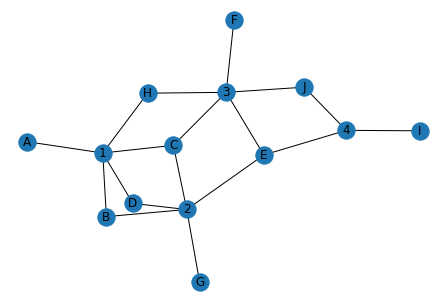

In [38]:
nx.draw(B, with_labels = True)  

Can you tell if two teams share any fans? Use projected graph. 

In [34]:
X = set([1,2,3,4])
P = bipartite.projected_graph(B,X)
P.nodes()

NodeView((1, 2, 3, 4))

In [35]:
P = bipartite.weighted_projected_graph(B,X)
P.edges(data=True)

EdgeDataView([(1, 2, {'weight': 3}), (1, 3, {'weight': 2}), (2, 3, {'weight': 2}), (2, 4, {'weight': 1}), (3, 4, {'weight': 2})])

In [36]:
P = bipartite.weighted_projected_graph(B,X,ratio=True)
P.edges(data=True)

EdgeDataView([(1, 2, {'weight': 0.3}), (1, 3, {'weight': 0.2}), (2, 3, {'weight': 0.2}), (2, 4, {'weight': 0.1}), (3, 4, {'weight': 0.2})])

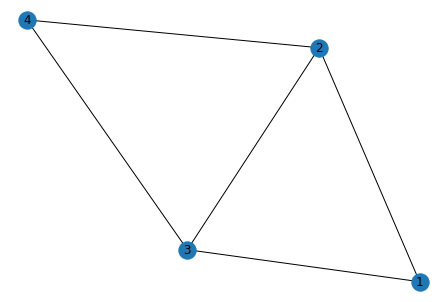

In [37]:
nx.draw(P, with_labels = True)  